# Speech Enhancement Based on SpeechBrain

## 1. Objectives
This lab exercise enables you to learn how to use the pre-trained speech models from SpeechBrain to reduce the noise in speech files.

## 2. Prerequisites
Before starting this lab, you should learn the <a href="https://speechbrain.readthedocs.io/en/v1.0.3/tutorials/basics.html">basics</a> of SpeechBrain and read the <a href="https://speechbrain.readthedocs.io/en/v1.0.3/tutorials/tasks/speech-enhancement-from-scratch.html">tutorial</a> on speech enhancement. After knowing what SpeechBrain is about and how it performs speech enhancement, you need to read the procedure for using its <a href="https://speechbrain.readthedocs.io/en/v1.0.3/API/speechbrain.inference.enhancement.html">pre-trained models</a> for speech enhancement.

##3. Submission
Write a report, convert it to PDF, and submit it to Blackboard before the deadline specified in Blackboard. Your report may contain the following:
<ol type="a">
  <li>Discussions on your observations, e.g., what kind of noise is difficult for the pre-trained model</li>
  <li>Waveforms and spectrograms of clean, noisy, and denoised speech</li>
</ol>

##4. Prepare Colab Environment
Colab runs on browsers. You need a Google account to use Colab. If you do not have one, visit https://support.google.com/mail/answer/56256?hl=en.

Display the Google Drive page (https://drive.google.com/drive/my-drive) in your browser. Use the “+ New” button on the left panel to create a directory structure in your Google Drive as follows: "My Drive/Learning/EIE558/Lab1"

##5. Procedure
1. Upload this .ipynb file to your Google Drive under the "My Drive/Learning/EIE558/Lab1" folder.
2. Download the .wav files
1. Execute the following cells.

In [1]:
# Check Python version (This script was tested on 3.12)
!python --version

Python 3.12.11


In [1]:
# Mount Google Drive and change to the Lab1 folder.
# You should perform this step after the expiration of each session.
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd /content/drive/MyDrive/Learning/EIE558/Lab1

Mounted at /content/drive/
/content/drive/MyDrive/Learning/EIE558/Lab1


In [ ]:
# Installing SpeechBrain via pip.
# You should perform this step after the expiration of each Colab session.
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH

In [ ]:
# Clone SpeechBrain repository to your Lab1 folder. Skip this step if you have done this before.
%cd /content/drive/MyDrive/Learning/EIE558/Lab1
!git clone https://github.com/speechbrain/speechbrain/

In [53]:
# Define a function that plots the waveforms and spectrograms of noisy and enhanced speech
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def show_wav_and_spec(wavfile):
  waveform, srate = librosa.load(wavfile, sr=librosa.get_samplerate(wavfile))
  n_samples = len(waveform)
  frm_size = int(0.032 * srate)       # 32ms per frame
  frm_shift = int(0.01 * srate)       # 100Hz frame rate
  n_fft = n_samples if (n_samples < frm_size) else frm_size

  # Compute magnitude spectrogram
  magspec = abs(librosa.stft(y=waveform, n_fft=frm_size, hop_length=frm_shift))

  # Plot spectrogram and waveform
  plt.figure(figsize=(10, 4))
  plt.subplot(211)
  librosa.display.specshow(librosa.amplitude_to_db(magspec), sr=srate, y_axis='linear',
                           hop_length=frm_shift)
  plt.subplot(313)
  librosa.display.waveshow(waveform, sr=srate, offset=0)
  plt.margins(x=0)
  plt.show()

  display(Audio(wavfile, autoplay=True))

In [39]:
# Download and use a spectral-masking based pre-trained model to enhance speech
%cd /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement
import torch
from speechbrain.inference.enhancement import SpectralMaskEnhancement

# Model is downloaded from the speechbrain HuggingFace repo
enhancer = SpectralMaskEnhancement.from_hparams(source="speechbrain/metricgan-plus-voicebank",
                                                savedir="tmpdir1",)
enhanced = enhancer.enhance_file("../../../noisyspeech16k.wav", output_filename="../../../enhanced1.wav")

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir1/hyperparams.yaml'
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmpdir1.
INFO:speechbrain.utils.fetching:Fetch enhance_model.ckpt: Using symlink found at '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir1/enhance_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["enhance_model"] = /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir1/enhance_model.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: enhance_model
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): enhance_model -> /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir1/enhance_model.ckpt


/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

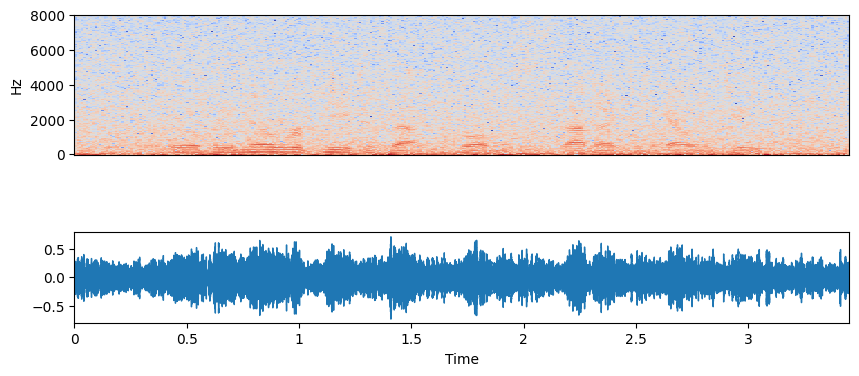

In [50]:
# Display the spectrogram and waveform of the noisy speech file and play the audio file
show_wav_and_spec("../../../noisyspeech16k.wav")

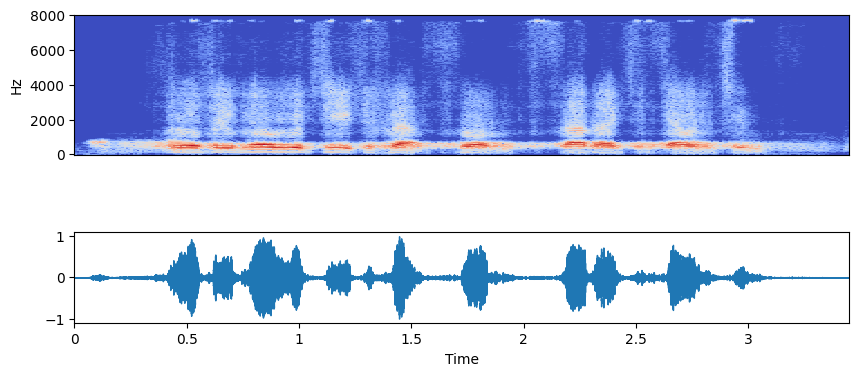

In [54]:
# Display the spectrogram and waveform of the enhanced speech file and play the audio file
show_wav_and_spec("../../../enhanced1.wav")

In [42]:
# Download and use an end-to-end pre-trained model to enhance speech
%cd /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement

from speechbrain.inference.enhancement import WaveformEnhancement
# Model is downloaded from the speechbrain HuggingFace repo
enhancer = WaveformEnhancement.from_hparams(source="speechbrain/mtl-mimic-voicebank",
                                            savedir="tmpdir2",)
enhanced = enhancer.enhance_file("../../../noisyspeech16k.wav", output_filename="../../../enhanced2.wav")

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/hyperparams.yaml'


/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement


DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmpdir2.
INFO:speechbrain.utils.fetching:Fetch enhance_model.ckpt: Using symlink found at '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["enhance_model"] = /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: enhance_model
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): enhance_model -> /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt


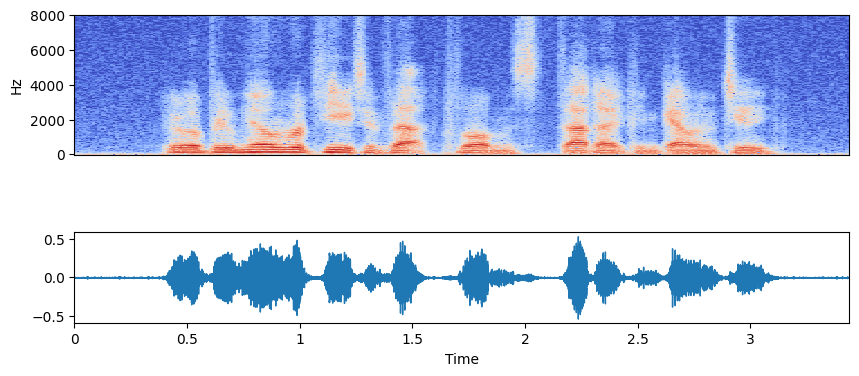

In [55]:
# Display the spectrogram and waveform of the enhanced speech file and play the audio file
show_wav_and_spec("../../../enhanced2.wav")